In [53]:
%matplotlib inline

In [54]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [55]:
# Read in csv file and create dataframe
wine_file = "winemag-data-130k-v2.csv"
wine_file_df = pd.read_csv(wine_file)
wine_file_df.dropna()
wine_file_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [56]:
# Clean dataset
wine_table = wine_file_df[["title", "points", "price", "country", "designation",
                            "province", "taster_name", "variety", "winery"]]
wine_table.dropna()
wine_table.head()

,title,points,price,country,designation,province,taster_name,variety,winery
0,Nicosia 2013 Vulkà Bianco (Etna),87,NaN,Italy,Vulkà Bianco,Sicily & Sardinia,Kerin O’Keefe,White Blend,Nicosia
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),87,15.0,Portugal,Avidagos,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,Rainstorm 2013 Pinot Gris (Willamette Valley),87,14.0,US,NaN,Oregon,Paul Gregutt,Pinot Gris,Rainstorm
3,St. Julian 2013 Reserve Late Harvest Riesling ...,87,13.0,US,Reserve Late Harvest,Michigan,Alexander Peartree,Riesling,St. Julian
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,87,65.0,US,Vintner's Reserve Wild Child Block,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks


In [57]:
# Rename columns
wine_table = wine_table.rename(columns={"title": "Wine Name", "points": "Rating", "price": "Price", "country": "Country", "designation": "Designation", "province": "Province", "taster_name": "Taster Name", "variety": "Variety", "winery": "Winery"})
wine_table.dropna()

,Wine Name,Rating,Price,Country,Designation,Province,Taster Name,Variety,Winery
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),87,15.0,Portugal,Avidagos,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
3,St. Julian 2013 Reserve Late Harvest Riesling ...,87,13.0,US,Reserve Late Harvest,Michigan,Alexander Peartree,Riesling,St. Julian
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,87,65.0,US,Vintner's Reserve Wild Child Block,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,87,15.0,Spain,Ars In Vitro,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem
6,Terre di Giurfo 2013 Belsito Frappato (Vittoria),87,16.0,Italy,Belsito,Sicily & Sardinia,Kerin O’Keefe,Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...
129963,Dalton 2012 Oak Aged Cabernet Sauvignon (Galilee),90,20.0,Israel,Oak Aged,Galilee,Mike DeSimone,Cabernet Sauvignon,Dalton
129965,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,90,28.0,France,Seppi Landmann Vallée Noble,Alsace,Roger Voss,Pinot Gris,Domaine Rieflé-Landmann
129966,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,90,28.0,Germany,Brauneberger Juffer-Sonnenuhr Spätlese,Mosel,Anna Lee C. Iijima,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129968,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,90,30.0,France,Kritt,Alsace,Roger Voss,Gewürztraminer,Domaine Gresser


In [58]:
# Extract Year from Wine Names
wine_table.insert(1,'Year','')
wine_table['Year']=wine_table['Wine Name'].str.extract('(\d\d\d\d)', expand=True)
wine_table.head()

,Wine Name,Year,Rating,Price,Country,Designation,Province,Taster Name,Variety,Winery
0,Nicosia 2013 Vulkà Bianco (Etna),2013,87,NaN,Italy,Vulkà Bianco,Sicily & Sardinia,Kerin O’Keefe,White Blend,Nicosia
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),2011,87,15.0,Portugal,Avidagos,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,Rainstorm 2013 Pinot Gris (Willamette Valley),2013,87,14.0,US,NaN,Oregon,Paul Gregutt,Pinot Gris,Rainstorm
3,St. Julian 2013 Reserve Late Harvest Riesling ...,2013,87,13.0,US,Reserve Late Harvest,Michigan,Alexander Peartree,Riesling,St. Julian
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,2012,87,65.0,US,Vintner's Reserve Wild Child Block,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks


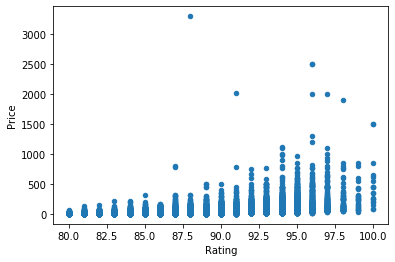

In [59]:
# Scatter plot to show Price and Rating relationship
wine_table.plot(kind="scatter", y='Price', x='Rating')

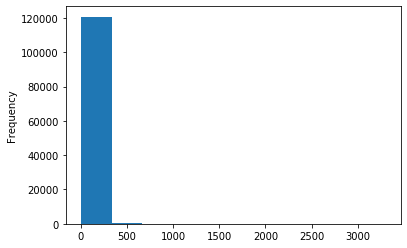

In [60]:
# Histogram to show Price frequencies
wine_table['Price'].plot(kind='hist')

In [61]:
# Setting the upper bound to remove outliers
upper_bound = 1.5 * (wine_table.Price.quantile(0.75) - wine_table.Price.quantile(0.25)) + wine_table.Price.quantile(0.75)
upper_bound

79.5

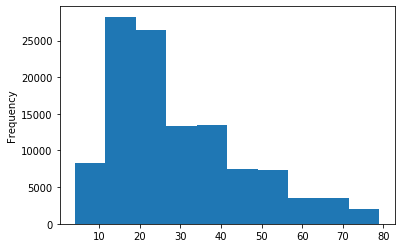

In [62]:
# Histogram to show Price frequencies without outliers
wine_table.loc[wine_table.Price < upper_bound, "Price"].plot(kind="hist")

In [63]:
# Get price values below upper bound
no_outliers = wine_table.loc[wine_table.Price < upper_bound]

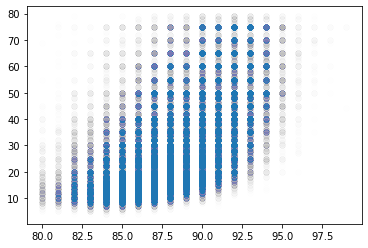

In [64]:
# Scatter plot to show Price and Ratings without outliers
plt.scatter(no_outliers['Rating'], no_outliers['Price'], alpha=0.005)
plt.xlabel = "Price"
plt.ylabel = "Rating"

In [65]:
# Setting Rating Bins
no_outliers['rating_bins'] = pd.cut(no_outliers['Rating'], bins=20)

C:\Users\omoto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


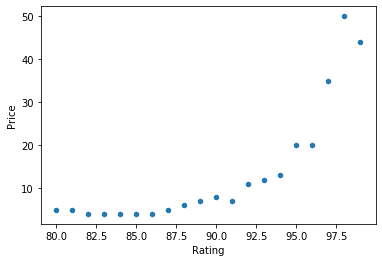

In [66]:
# Scatter plot to show minimum prices of ratings
no_outliers.groupby("rating_bins").min().plot(kind='scatter', x='Rating', y='Price')

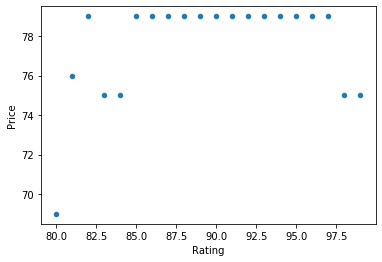

In [67]:
# Scatter plot to show maximum prices of ratings
no_outliers.groupby("rating_bins").max().plot(kind='scatter', x='Rating', y='Price')

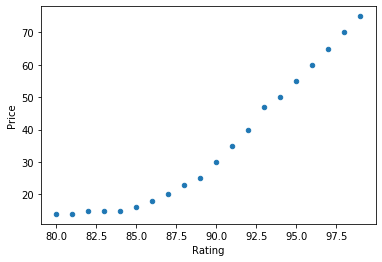

In [68]:
# Scatter plot to show median prices of ratings
no_outliers.groupby("rating_bins").median().plot(kind='scatter', x='Rating', y='Price')

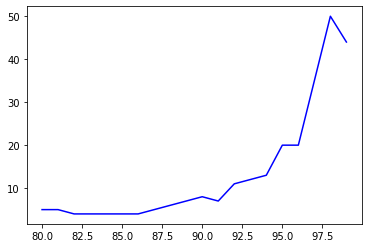

In [69]:
# Line graph to show minimum price per rating bin
plt.plot(xdata, ydata, 'b-')

In [70]:
# Setting function to create exponential curve (for minimum prices)
def func(x, m, a):
    return a * m ** (x)

In [71]:
# Get minimum price per rating bin
min_data = no_outliers.groupby("rating_bins").min()

In [72]:
# Set x and y axes values for minimum price per rating bin
xdata = min_data['Rating']
ydata = min_data['Price']

In [73]:
# Get optimal values for curve fit
popt, pcov = curve_fit(func, xdata, ydata)

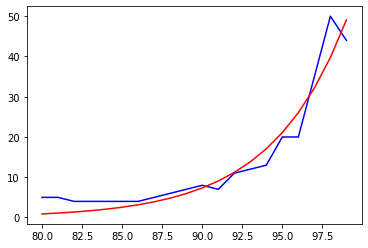

In [74]:
# Plot minimum price line graph with curve of best fit
plt.plot(xdata, ydata, 'b-')
plt.plot(xdata, func(xdata, *popt), 'r-')

In [75]:
# Finding r-squared value to determine variance
ybar = ydata.mean()
ss_tot = sum((ydata - ybar) ** 2)
ss_res = sum((ydata - (popt[1]*popt[0] ** xdata))**2)
R2 = 1 - (ss_res / ss_tot)
R2

0.9298764418283975

In [76]:
# Determine minimum price based on rating
popt[1]*popt[0] ** 95

21.08815241285697